<a href="https://colab.research.google.com/github/xwang222/My-Projects/blob/main/Machine_Learning_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning from Scratch**
This notebook contains code that I collected or reformatted from different online resources when I learn these concepts. The purpose of making this file includes:

**1. For my own reference (most important reason)** 
 
**2. To further simplify the existing coding by removing helper functions**
  
  I totally agree that helper functions are really great and correct ways to do the algorithm, but to me as a beginner, a long list of helper functions simply makes me lose the track. I created this notebook to help guys who prefer hard-coding in the algorithm just for the learning purpose.

**3. To include and explain some of my confusions during the learning process.**

  My way of learning the key concepts that I couldn't get the idea through a quick google search is to dive into the algorithm from scratch. I do think it is helpful and I also included my understanding or clarification at the beginning of each method if any.

**Note:** Some of the algorithms don't include a evaluation stage. This is because I think for most of readers, the confusion is not at the evaluation stage, but during the learning phase. The evaluation can usually be done with some common helper funcitons that are easy to find.

# Unsurpervised Learning

## K means clustering
K-means is an unsupervised learning method. The algorithm is:
```
1. Randomly pick K points as K centroids
2. for each data points:
    2.1 calculate the distance between the data point and the K 
       centroids;
    2.2 store the distance and assign the label of the centroid with 
       the smallest distance
3. calculate the new centroid based on the distance and assignment obtained from 2.2 
4. repeat step 2 and 3 until convergence (total distance not change much)
```



In [ ]:
import math
import numpy as np
import pandas as pd
np.random.seed(123)

def circulo(num_datos = 100,R = 1, minimo = 0,maximo= 1, center_x = 0 , center_y = 0):
    pi = math.pi
    r = R * np.sqrt(np.random.uniform(minimo, maximo, size = num_datos)) 
    theta = np.random.uniform(minimo, maximo, size= num_datos) * 2 * pi

    x = center_x + np.cos(theta) * r
    y = center_y + np.sin(theta) * r

    x = np.round(x,3)
    y = np.round(y,3)

    df = np.column_stack([x,y])
    df = pd.DataFrame(df)
    df.columns = ['x','y']
    return(df)

# Create data
datos_1 = circulo(num_datos = 20,R = 10, center_x = 5, center_y = 30)
datos_2 = circulo(num_datos = 20,R = 10, center_x = 20, center_y = 10)
datos_3 = circulo(num_datos = 20,R = 10, center_x = 50, center_y = 50)

data = datos_1.append(datos_2).append(datos_3)
data.head()

,x,y
0,-0.542,23.761
1,8.129,25.661
2,4.239,25.298
3,-0.691,25.230
4,3.539,21.645


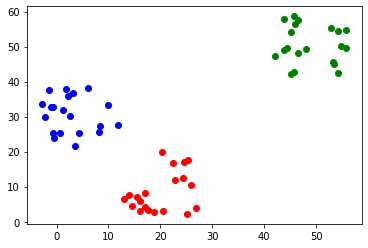

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(datos_1['x'], datos_1['y'], c = 'b')
plt.scatter(datos_2['x'], datos_2['y'], c = 'r')
plt.scatter(datos_3['x'], datos_3['y'], c = 'g')
plt.show()

In [ ]:
# initialize
# randomly pick three centroids
k = 3
n_dims = data.shape[1]
centroid_min = data.min().min()
centroid_max = data.max().max()
centroids = []

for centroid in range(k):
    centroid = np.random.uniform(centroid_min, centroid_max, n_dims)
    centroids.append(centroid)

centroids = pd.DataFrame(centroids, columns = data.columns)

In [ ]:
Total_err=[0]
diff=1

In [ ]:
# do the following when diff is no less than 0.0001
while diff>=0.0001:
  # initialize list for each outer loop
  closest_centroid_all=[]
  centroid_error_all=[]

  for k in range(data.shape[0]):
    # initialize for each dataframe loop
    distance_all = np.array([])

    # evaluate for each centroid
    for i in range(centroids.shape[0]):
      a=centroids.iloc[i, :2]
      #print(a)
      b=data.iloc[k,:2]
      #print(b)

      # calculate distance of data point k to each centroid
      distance = np.sqrt(np.sum((a-b)**2))
      distance_all = np.append(distance_all, distance)
    
    # select the centroid with minimum distance for each data point k
    closest_centroid =  np.where(distance_all == np.amin(distance_all))[0].tolist()[0]
    centroid_error = np.amin(distance_all)
    
    # store the centroid for all points
    closest_centroid_all=np.append(closest_centroid_all, closest_centroid)
    centroid_error_all=np.append(centroid_error_all, centroid_error)
  
  # calculate total of distance
  Total_err=np.append(Total_err, centroid_error_all.sum())

  # append list to dataframe
  data['centroid']=closest_centroid_all
  data['error']=centroid_error_all

  # update centroid
  data_columns = ['x','y']

  centroids = data.groupby('centroid').agg('mean').loc[:,data_columns].reset_index(drop = True)
  #centroids

  # evaluate
  diff=abs(Total_err[-1]-Total_err[-2])

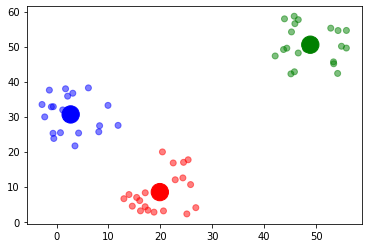

In [ ]:
colors = {0:'red', 1:'blue', 2:'green'}
plt.scatter(data.iloc[:,0], data.iloc[:,1],  marker = 'o', c = data['centroid'].apply(lambda x: colors[x]), alpha = 0.5)
plt.scatter(centroids.iloc[:,0], centroids.iloc[:,1],  marker = 'o', s=300, 
           c = centroids.index.map(lambda x: colors[x]))

## PCA
Below is the algorithm:


```
1. Standardize (demean)
2. Calculate covariance matrix
3. Calculate the eigen value of the covariance matrix
4. Sort the eigen values (descending)
5. Project X onto eigen vectors (dot product)
```



In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets

# data = datasets.load_digits()
data = datasets.load_iris()
X = data.data
y = data.target

In [ ]:
n_components=2
mean = np.mean(X, axis=0)
X = X - mean

# covariance, function needs samples as columns
cov = np.cov(X.T)

# eigenvalues, eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov)

# -> eigenvector v = [:,i] column vector, transpose for easier calculations
# sort eigenvectors
eigenvectors = eigenvectors.T
idxs = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]

# store first n eigenvectors
components = eigenvectors[0 : n_components]

np.dot(X, components.T)

array([[-2.68412563, -0.31939725],
       [-2.71414169,  0.17700123],
       [-2.88899057,  0.14494943],
       [-2.74534286,  0.31829898],
       [-2.72871654, -0.32675451],
       [-2.28085963, -0.74133045],
       [-2.82053775,  0.08946138],
       [-2.62614497, -0.16338496],
       [-2.88638273,  0.57831175],
       [-2.6727558 ,  0.11377425],
       [-2.50694709, -0.6450689 ],
       [-2.61275523, -0.01472994],
       [-2.78610927,  0.235112  ],
       [-3.22380374,  0.51139459],
       [-2.64475039, -1.17876464],
       [-2.38603903, -1.33806233],
       [-2.62352788, -0.81067951],
       [-2.64829671, -0.31184914],
       [-2.19982032, -0.87283904],
       [-2.5879864 , -0.51356031],
       [-2.31025622, -0.39134594],
       [-2.54370523, -0.43299606],
       [-3.21593942, -0.13346807],
       [-2.30273318, -0.09870885],
       [-2.35575405,  0.03728186],
       [-2.50666891,  0.14601688],
       [-2.46882007, -0.13095149],
       [-2.56231991, -0.36771886],
       [-2.63953472,

## Expectation Maximization (Gaussian Mixture Model)
For theoretical explanation, please go to:
https://zhiyzuo.github.io/EM/

In [ ]:
import numpy as np
import scipy as sp
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
X = np.random.multivariate_normal([0, 3], [[0.5, 0], [0, 0.8]], 20)
X = np.vstack((X, np.random.multivariate_normal([20, 10], np.identity(2), 50)))
X.shape

(70, 2)

In [ ]:
m,n=X.shape
k=2

In [ ]:
# initialization
mean_arr = np.asmatrix(np.random.random((k, n)))
sigma_arr = np.array([np.asmatrix(np.identity(n)) for i in range(k)])
phi = np.ones(k)/k
w = np.asmatrix(np.empty((m, k), dtype=float))

In [ ]:
LL_list=[0]
diff=1

In [ ]:
while diff>0.0001:
  
  # - Estep
  for i in range(m):
    den = 0
    for j in range(k):
        num = sp.stats.multivariate_normal.pdf(X[i, :],mean_arr[j].A1,sigma_arr[j]) *phi[j]
        den += num
        w[i, j] = num
    w[i, :] /= den

  # - Mstep
  for j in range(k):
    const = w[:, j].sum()
    phi[j] = 1/m * const
    _mu_j = np.zeros(n)
    _sigma_j = np.zeros((n, n))

    for i in range(m):
      _mu_j += (X[i, :] * w[i, j])
      _sigma_j += w[i, j] * ((X[i, :] - mean_arr[j, :]).T * (X[i, :] - mean_arr[j, :]))
      #print((self.data[i, :] - self.mean_arr[j, :]).T * (self.data[i, :] - self.mean_arr[j, :]))

    mean_arr[j] = _mu_j / const
    sigma_arr[j] = _sigma_j / const

  # calculate LL
  ll = 0
  for i in range(m):
    tmp = 0
    for j in range(k):
        #print(self.sigma_arr[j])
        tmp += sp.stats.multivariate_normal.pdf(X[i, :],mean_arr[j, :].A1,sigma_arr[j, :]) *phi[j]
    ll += np.log(tmp)

  # store LL and compare

  LL_list.append(ll)
  diff=LL_list[-1]-LL_list[-2] 

In [ ]:
mean_arr
sigma_arr
phi

## DBSCAN 
https://www.youtube.com/watch?v=RDZUdRSDOok

## Forthcoming
T-SNE

Hierarchical clustering

Latent semantic analysis 

Hidden Markov Models (HMMs)

Independent Component Analysis (ICA)

# Supervised Learning

## Linear Regression with gradient descent
reference: 
https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/linear_regression.py

In [ ]:
import numpy as np


def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2


class LinearRegression:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated


# Testing
if __name__ == "__main__":
    # Imports
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split
    from sklearn import datasets

    def mean_squared_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4
    )

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    regressor = LinearRegression(learning_rate=0.01, n_iters=1000)
    regressor.fit(X_train, y_train)
    predictions = regressor.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    print("MSE:", mse)

    accu = r2_score(y_test, predictions)
    print("Accuracy:", accu)

    y_pred_line = regressor.predict(X)
    cmap = plt.get_cmap("viridis")
    fig = plt.figure(figsize=(8, 6))
    m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
    m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
    plt.plot(X, y_pred_line, color="black", linewidth=2, label="Prediction")
    plt.show()

## Linear Regression with Matrix Multiplication
$beta=(X'X)^{-1}(X'Y)$

In [ ]:
beta_hat = np.linalg.inv(X_mat.T.dot(X_mat)).dot(X_mat.T).dot(Y)
yhat = X_m.dot(beta_hat)

## Logistic Regression with Gradient Descent
The optimization was completed by (batch) gradient descent. The expression of the gradient needs to be derived.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [ ]:
# initialization
n_samples, n_features = X_train.shape
weights = np.ones(n_features)
bias = 0

cost_list=[0]
lr=0.001
epoch=20
diff=1

'\nb=np.ones((X_train.shape[0],1))\nX=np.concatenate((b,X_train),axis=1)\nw=np.zeros(X_train.shape[1]).reshape(-1,1)\ndiff=1\n'

In [ ]:
def _sigmoid(x):
    return 1 / (1 + np.exp(-x))
    
np.seterr(divide = 'ignore') 

{'divide': 'ignore', 'invalid': 'warn', 'over': 'warn', 'under': 'ignore'}

In [ ]:
for i in range(1000):
#while diff>=0.000001:
  #z=np.dot(X_train,w)
  linear_model = np.dot(X_train, weights) + bias
  y_predicted=_sigmoid(linear_model)

  # calculate loss
  cost = (-y_train * np.log(y_predicted) - (1-y_train) * np.log(1-y_predicted)).mean()    
  cost_list.append(cost)
  
  # gradient descent
  dw = (1 / n_samples) * np.dot(X_train.T, (y_predicted - y_train))
  db = (1 / n_samples) * np.sum(y_predicted - y_train)
  #gr = np.dot(X_train.T,(s-y_train)) / y_train.shape[0]
  #print(cost_list)
  #print(gr)

  # update weight
  # update parameters
  weights -= lr * dw
  bias -= lr * db
  #print(w)

  # calculate difference
  diff=abs(cost_list[-1]-cost_list[-2])
  #print(diff)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in multiply
  import sys


In [ ]:
linear_model = np.dot(X_test, weights) + bias
y_predicted = 1/(1+np.exp(-linear_model))
predictions = [1 if i > 0.5 else 0 for i in y_predicted]
print("LR classification accuracy:", accuracy(y_test, predictions))

LR classification accuracy: 0.9122807017543859


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


## Logistic Regression with Stochastic Gradient Descent
The difference between batch gradient descent and SGD is in SGD, in each loop, only one observation is passed to update the weight.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
A=np.random.normal(0,1,1000)
B=np.random.normal(0,1,1000)
C=np.random.normal(0,1,1000)

Z=3+0.5*A+0.1*B+C
S=1/(1+np.exp(-Z))
y=[1 if x>=0.5 else 0 for x in S]

In [ ]:
df=pd.DataFrame()
df['A']=A
df['B']=B
df['Y']=y

In [ ]:
lr=0.01
epoch=20

In [ ]:
b=np.ones((1,1))
w=np.zeros(X_SGD.shape[1]).reshape(-1,1)
cost_list=[0]
diff=1

In [ ]:
def initialization(X):
  b=np.ones((X.shape[0],1))
  X=np.concatenate((b,X),axis=1)
  w=np.zeros(X.shape[1]).reshape(-1,1)
  return X,w

def get_z(self,X,w):
  return np.dot(X,w)

def sigmoid(self,z):
  return 1/(1+np.exp(-z))

def predict(self,X,w):
  z=get_z(X,w)
  s=sigmoid(self,z)
  result=[1 if x>=0.5 else 0 for x in s]
  return result

def calculate_loss_SGD(a,y):
  return (-y * np.log(a) - (1-y) * np.log(1-a))

def gradient_descent(X,a,y):
  return np.dot(X.T,(a-y)) / y.shape[0]

def fit(self,X,y):
  #initialization
  X, w = initialization(X)
  #iterations
  for i in range(epoch):
      #prediction
      z = get_z(X)
      #sigmoid
      a = sigmoid(z)
      #calculate lost
      #gradient

      cost = calculate_loss(a, y)    
      cost_list.append(cost)
      gr = gradient_descent(X, a, y)

      #update w
      w = update(w, gr)

  #self.b = X[:,0]
  return True

def update(w,gr):
  return w - lr * gr


In [ ]:
while diff>0.0000001:
  SGD_df=df.sample(1)
  X_SGD=SGD_df[['A','B']].values
  y_SGD=SGD_df[['Y']].values
  X_SGD=np.concatenate((b,X_SGD),axis=1)
  z=np.dot(X_SGD,w)
  s=1/(1+np.exp(-z))
  cost = calculate_loss_SGD(s, y_SGD)    
  cost_list.append(cost)
  gr = gradient_descent(X_SGD, s, y_SGD)
  print(cost_list)
  print(gr)
  w = update(w, gr)
  print(w)
  diff=abs(cost_list[-1]-cost_list[-2])
  print(diff)

## LDA
Maximize betweeen-class variance and minimize with-class variance

```
1. Compute the within class and between class scatter matrices
2. Compute the eigenvectors and corresponding eigenvalues for the scatter matrices
3. Sort the eigenvalues and select the top k
4. Create a new matrix containing eigenvectors that map to the k eigenvalues
5. Obtain the new features (i.e. LDA components) by taking the dot product of the data and the matrix from step 4
```



In [ ]:
# Imports
import matplotlib.pyplot as plt
from sklearn import datasets

data = datasets.load_iris()
X, y = data.data, data.target

In [ ]:
n_features = X.shape[1]
class_labels = np.unique(y)
n_components = 2

In [ ]:
mean_overall = np.mean(X, axis=0)
SW = np.zeros((n_features, n_features))
SB = np.zeros((n_features, n_features))

In [ ]:
for c in class_labels:
  X_c = X[y == c]
  mean_c = np.mean(X_c, axis=0)
  # (4, n_c) * (n_c, 4) = (4,4) -> transpose
  SW += (X_c - mean_c).T.dot((X_c - mean_c))

  # (4, 1) * (1, 4) = (4,4) -> reshape
  n_c = X_c.shape[0]
  mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
  SB += n_c * (mean_diff).dot(mean_diff.T)

In [ ]:
# Determine SW^-1 * SB
A = np.linalg.inv(SW).dot(SB)
# Get eigenvalues and eigenvectors of SW^-1 * SB
eigenvalues, eigenvectors = np.linalg.eig(A)
# -> eigenvector v = [:,i] column vector, transpose for easier calculations
# sort eigenvalues high to low
eigenvectors = eigenvectors.T
idxs = np.argsort(abs(eigenvalues))[::-1]
eigenvalues = eigenvalues[idxs]
eigenvectors = eigenvectors[idxs]
# store first n eigenvectors
linear_discriminants = eigenvectors[0 : n_components]

In [ ]:
X_projected=np.dot(X, linear_discriminants.T)

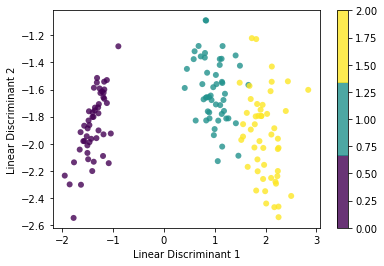

In [ ]:
x1, x2 = X_projected[:, 0], X_projected[:, 1]

plt.scatter(
  x1, x2, c=y, edgecolor="none", alpha=0.8, cmap=plt.cm.get_cmap("viridis", 3)
)

plt.xlabel("Linear Discriminant 1")
plt.ylabel("Linear Discriminant 2")
plt.colorbar()
plt.show()

## Naive Bayes
Assuming all data points are independent.


```
1. Use all trainning data to calcualte the mean and variance of each class (learning phase stops here);
2. For each test case,
  calculate the probabilty for all y
  select the label with the highest probability as final prediction
```



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import numpy as np

In [ ]:
X, y = datasets.make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
n_samples, n_features = X_train.shape
classes = np.unique(y_train)
n_classes = len(classes)

In [ ]:
# initialization
mean = np.zeros((n_classes, n_features), dtype=np.float64)
var = np.zeros((n_classes, n_features), dtype=np.float64)
priors = np.zeros(n_classes, dtype=np.float64)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [ ]:
# learning phrase
for idx, c in enumerate(classes):
#c=0
  X_c = X_train[y_train == c]
  mean[idx, :] = X_c.mean(axis=0)
  var[idx, :] = X_c.var(axis=0)
  priors[idx] = X_c.shape[0] / float(n_samples)

In [ ]:
# predict, should use X_test because all training information has been used in the learning phase
y_pred=[]
for x in X_train:
  pre_posteriors = []

  for idx, c in enumerate(classes):
    pdf_mean = mean[idx]
    pdf_var = var[idx]
    pdf_numerator = np.exp(-((x - pdf_mean) ** 2) / (2 * pdf_var))
    pdf_denominator = np.sqrt(2 * np.pi * pdf_var)
    P = pdf_numerator / pdf_denominator

    pre_prior = np.log(priors[idx])
    pre_posterior = np.sum(np.log(P))
    pre_posterior = pre_prior + pre_posterior
    pre_posteriors.append(pre_posterior)
  
  y_pred.append(classes[np.argmax(pre_posteriors)])

## K Nearest Neighbour
KNN is a supervised learning method. The algorithm is:
```
1. For each test point, calculate the distance between the test point and all training points.
2. Select the first K nearest points from trainning data
3. The majority of the vote decides the final prediction.
```





In [ ]:
from sklearn import datasets

iris = datasets.load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Separate X and y data

X = df.drop('target', axis=1)
y = df.target

In [ ]:
def minkowski_distance(a, b, p=2):
    
    # Store the number of dimensions
    dim = len(a)
    
    # Set initial distance to 0
    distance = 0
    
    # Calculate minkowski distance using parameter p
    for d in range(dim):
        distance += abs(a[d] - b[d])**p
        
    distance = distance**(1/p)
    
    return distance

In [ ]:
# Define an arbitrary test point

test_pt = [4.8, 2.7, 2.5, 0.7]

# Calculate distance between test_pt and all points in X

distances = []

for i in X.index:
    
    distances.append(minkowski_distance(test_pt, X.iloc[i]))
    
df_dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
df_dists.head()

,dist
0,1.479865
1,1.249000
2,1.396424
3,1.204159
4,1.519868


In [ ]:
# Find the 5 nearest neighbors

df_nn = df_dists.sort_values(by=['dist'], axis=0)[:5]
df_nn

,dist
98,0.734847
57,0.911043
93,0.964365
24,1.048809
23,1.063015


In [ ]:
from collections import Counter

# Create counter object to track the labels

counter = Counter(y[df_nn.index])

# Get most common label of all the nearest neighbors

counter.most_common()[0][0]

1

## Decision Tree
Due to the recursive method of tree-growing, I am not able to run the algorithm without explicitly using Class. A few side comments are as follows:
1. Prediction is given at each leaf node. The precdiction of each leaf node is determined by the majority of labels at that leaf node.

2. In the prediction phase, a single data point is to traverse the tree. The path and final destination (leaf node) is determined by decision rules trainned by training samples.

3. To me, coding decision tree from scratch is challenging because it uses recursion.

This episode of code is directly copied from: 

https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/decision_tree.py

You can also find some excellent video explanation from the author here: 

https://www.youtube.com/watch?v=Bqi7EFFvNOg&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=9

In [ ]:
from collections import Counter

import numpy as np


def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        # stopping criteria
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)

        # greedily select the best split according to information gain
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)

        # grow the children that result from the split
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        # parent loss
        parent_entropy = entropy(y)

        # generate split
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # information gain is difference in loss before vs. after split
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    data = datasets.load_breast_cancer()
    X, y = data.data, data.target

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1234
    )

    clf = DecisionTree(max_depth=10)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    acc = accuracy(y_test, y_pred)

    print("Accuracy:", acc)

## Random Forest
The basic algorithm works as follows:


```
1. define multiple trees
2. For each tree:
   2.1 run decision tree algorithm on bootstrapped sample (B)
3. Aggregate across all trees and use the majority for prediction (aggregate) ---> Bagging
```

For coding reference, see here:

https://github.com/python-engineer/MLfromscratch/blob/master/mlfromscratch/random_forest.py

Video explanation:

https://www.youtube.com/watch?v=Oq1cKjR8hNo&list=PLqnslRFeH2Upcrywf-u2etjdxxkL8nl7E&index=10


## SVM
Linear SVM for simplicity.

Below is the algorithm:


```
1. start with raondom weights;
2. Update the weights using gradient descent
  *** the gradient is different based on the constrain
```



In [ ]:
from sklearn import datasets
import numpy as np

In [ ]:
X, y = datasets.make_blobs(
    n_samples=250, n_features=2, centers=2, cluster_std=1.05, random_state=1
)

In [ ]:
n_features = X.shape[1]
w = np.zeros(n_features)
b = 0

In [ ]:
lambda_param=0.01
lr=0.001

In [ ]:
cls_map=np.where(y <= 0, -1, 1)

In [ ]:
# total interations
for i in range(100):
# for each row in the data frame
  for idx, x in enumerate(X):
    print(x)

    # compute the constraint
    linear_model = np.dot(x, w) + b 
    constraint=cls_map[idx] * linear_model >= 1

    # get gradient, comes from the hinge loss function
    if constraint:
        dw = lambda_param * w
        db = 0
    else:
        dw = lambda_param * w - np.dot(cls_map[idx], x)
        db = - cls_map[idx]

    # udpate w
    w -= lr * dw
    b -= lr * db


## Gradient Boosting (Simplified)
**Some clarifications:**

1. The Gradient in Gradient boosting is with respect to the prediction, instead of the coefficients. Thus, given a squared loss function, the gradient is the residual.

2. To approximate the residual, and therefore the gradient, residual from the previous iteration is used as outcome variables.

3. When the weak learner is a tree, then the model is also known as **Multiple Additive Regression Tree (MART).**
**Reference:**https://www.kaggle.com/code/grroverpr/gradient-boosting-simplified/notebook

In [ ]:
%matplotlib inline

import pandas as pd
import numpy as np
from IPython.display import display
from fastai.imports import *
from sklearn import metrics

In [ ]:
class DecisionTree():
    def __init__(self, x, y, idxs = None, min_leaf=2):
        if idxs is None: idxs=np.arange(len(y))
        self.x,self.y,self.idxs,self.min_leaf = x,y,idxs,min_leaf
        self.n,self.c = len(idxs), x.shape[1]
        self.val = np.mean(y[idxs])
        self.score = float('inf')
        self.find_varsplit()
        
    def find_varsplit(self):
        for i in range(self.c): self.find_better_split(i)
        if self.score == float('inf'): return
        x = self.split_col
        lhs = np.nonzero(x<=self.split)[0]
        rhs = np.nonzero(x>self.split)[0]
        self.lhs = DecisionTree(self.x, self.y, self.idxs[lhs])
        self.rhs = DecisionTree(self.x, self.y, self.idxs[rhs])

    def find_better_split(self, var_idx):
        x,y = self.x.values[self.idxs,var_idx], self.y[self.idxs]
        sort_idx = np.argsort(x)
        sort_y,sort_x = y[sort_idx], x[sort_idx]
        rhs_cnt,rhs_sum,rhs_sum2 = self.n, sort_y.sum(), (sort_y**2).sum()
        lhs_cnt,lhs_sum,lhs_sum2 = 0,0.,0.

        for i in range(0,self.n-self.min_leaf-1):
            xi,yi = sort_x[i],sort_y[i]
            lhs_cnt += 1; rhs_cnt -= 1
            lhs_sum += yi; rhs_sum -= yi
            lhs_sum2 += yi**2; rhs_sum2 -= yi**2
            if i<self.min_leaf or xi==sort_x[i+1]:
                continue

            lhs_std = std_agg(lhs_cnt, lhs_sum, lhs_sum2)
            rhs_std = std_agg(rhs_cnt, rhs_sum, rhs_sum2)
            curr_score = lhs_std*lhs_cnt + rhs_std*rhs_cnt
            if curr_score<self.score: 
                self.var_idx,self.score,self.split = var_idx,curr_score,xi

    @property
    def split_name(self): return self.x.columns[self.var_idx]
    
    @property
    def split_col(self): return self.x.values[self.idxs,self.var_idx]

    @property
    def is_leaf(self): return self.score == float('inf')
    
    def __repr__(self):
        s = f'n: {self.n}; val:{self.val}'
        if not self.is_leaf:
            s += f'; score:{self.score}; split:{self.split}; var:{self.split_name}'
        return s

    def predict(self, x):
        return np.array([self.predict_row(xi) for xi in x])

    def predict_row(self, xi):
        if self.is_leaf: return self.val
        t = self.lhs if xi[self.var_idx]<=self.split else self.rhs
        return t.predict_row(xi)

In [ ]:
x = np.arange(0,50)
x = pd.DataFrame({'x':x})

In [ ]:
# just random uniform distributions in differnt range

y1 = np.random.uniform(10,15,10)
y2 = np.random.uniform(20,25,10)
y3 = np.random.uniform(0,5,10)
y4 = np.random.uniform(30,32,10)
y5 = np.random.uniform(13,17,10)

y = np.concatenate((y1,y2,y3,y4,y5))
y = y[:,None]

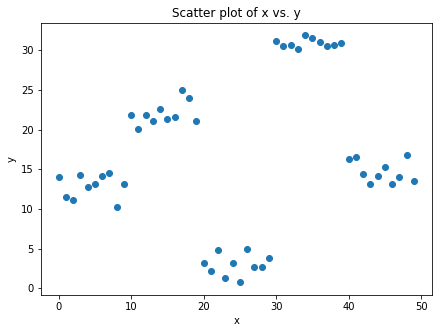

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(x,y, 'o')
plt.title("Scatter plot of x vs. y")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
def std_agg(cnt, s1, s2): return math.sqrt((s2/cnt) - (s1/cnt)**2)

In [ ]:
xi = x # initialization of input
yi = y # initialization of target
# x,y --> use where no need to change original y
ei = 0 # initialization of error
n = len(yi)  # number of rows
predf = 0 # initial prediction 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`)

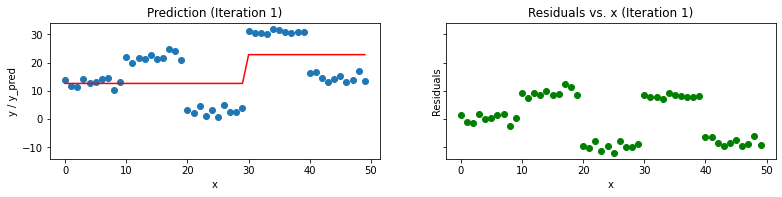

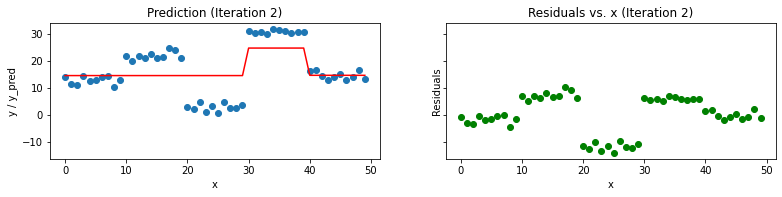

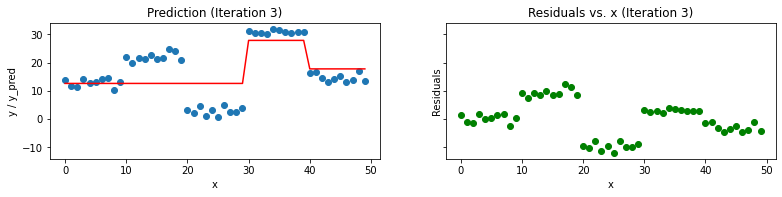

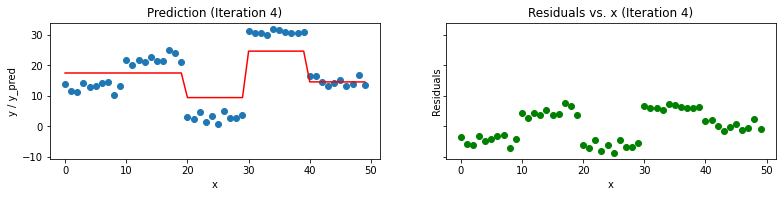

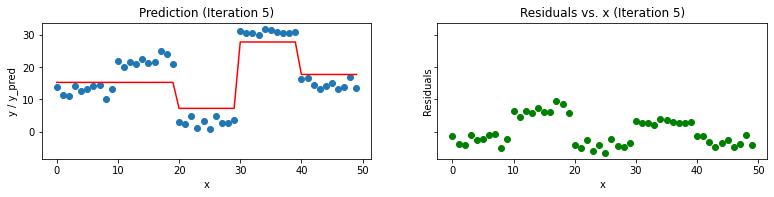

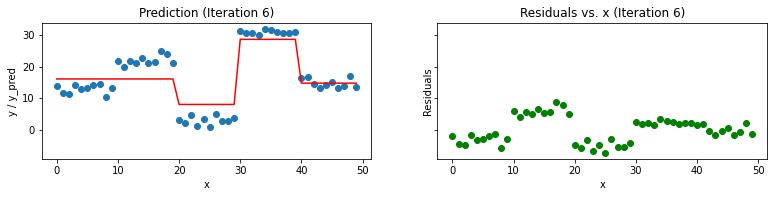

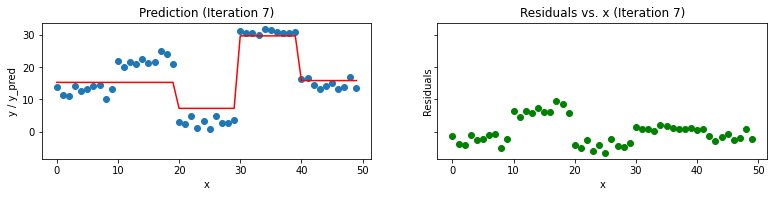

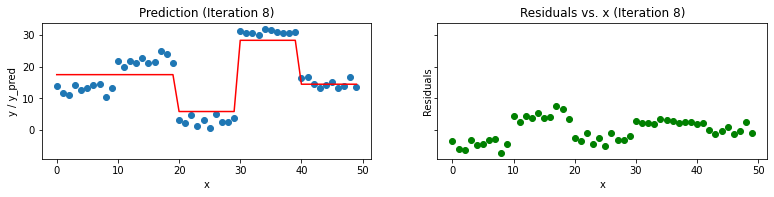

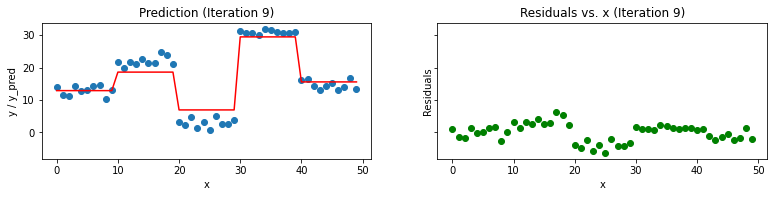

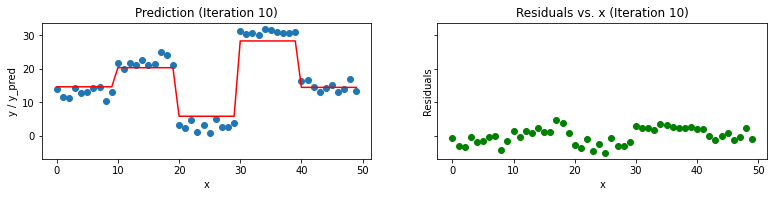

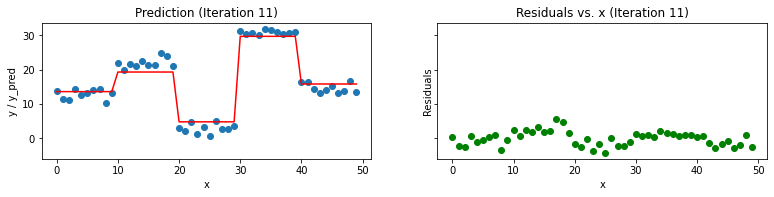

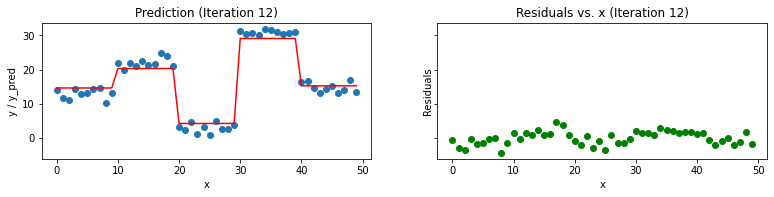

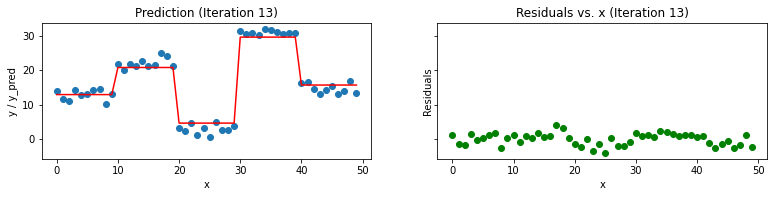

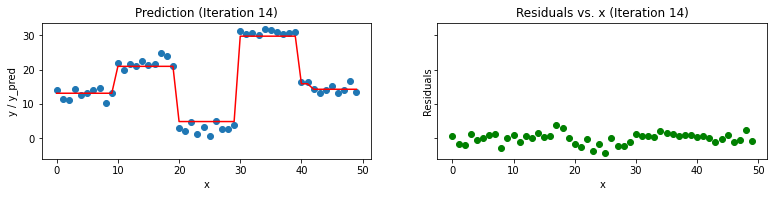

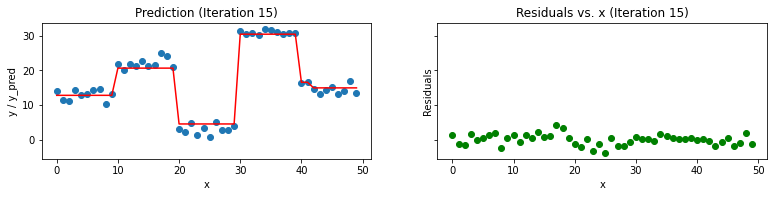

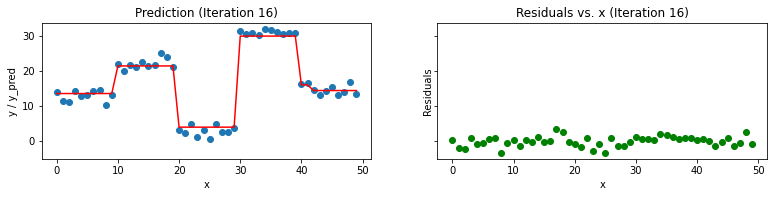

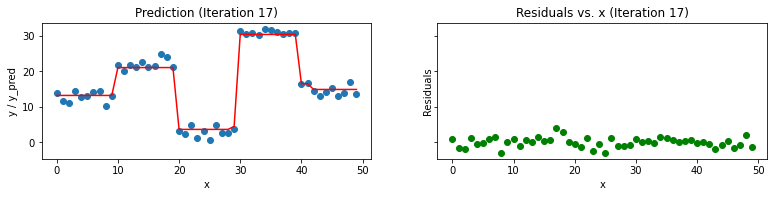

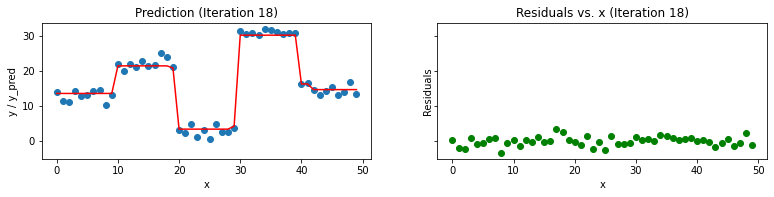

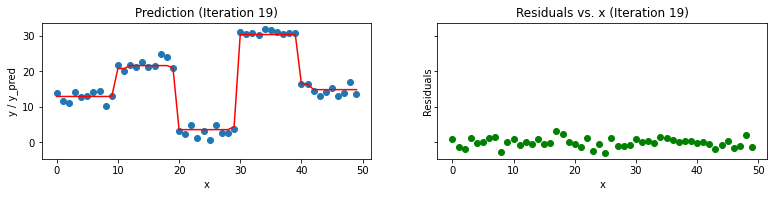

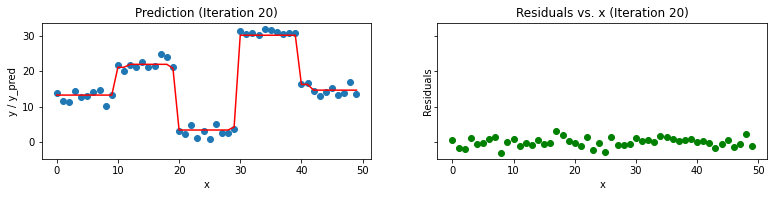

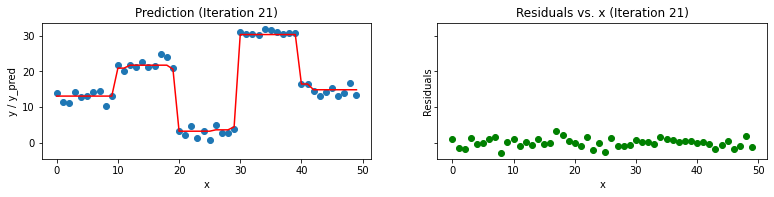

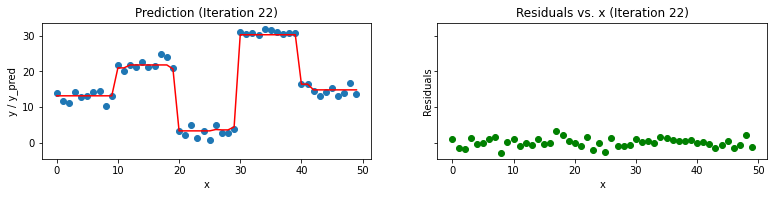

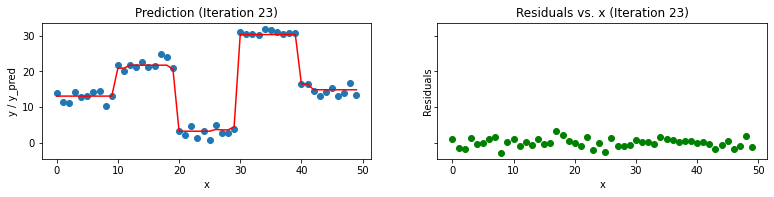

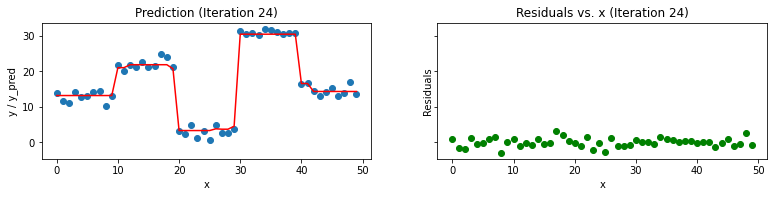

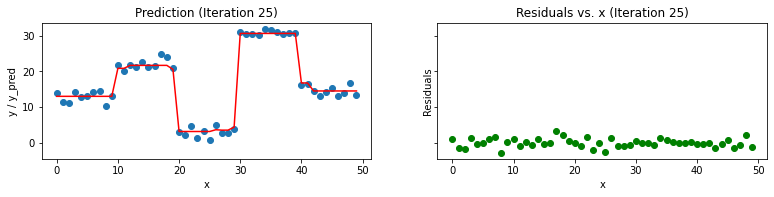

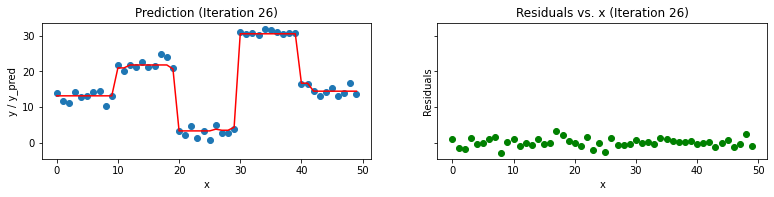

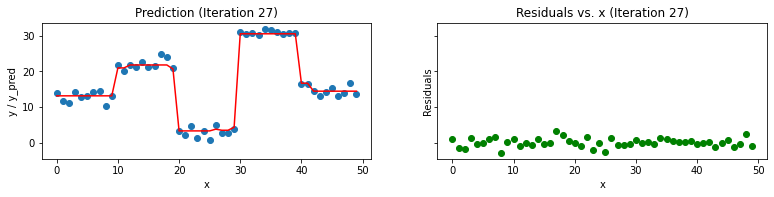

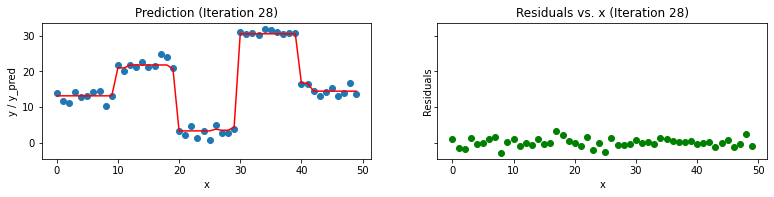

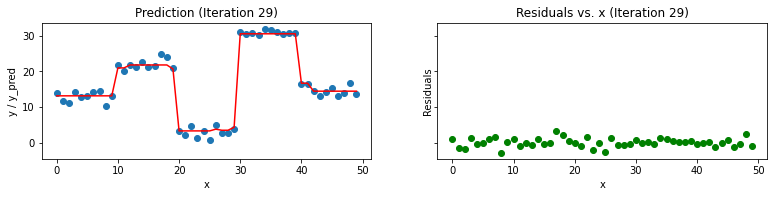

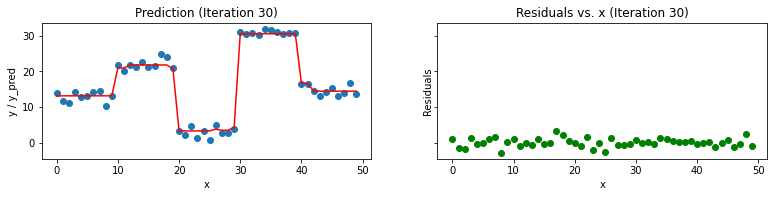

In [ ]:
for i in range(30):
  tree = DecisionTree(xi,yi)
  tree.find_better_split(0)
  r = np.where(xi == tree.split)[0][0]
  left_idx = np.where(xi <= tree.split)[0]
  right_idx = np.where(xi > tree.split)[0]
  predi = np.zeros(n)
  np.put(predi, left_idx, np.repeat(np.mean(yi[left_idx]), r))  # replace left side mean y
  np.put(predi, right_idx, np.repeat(np.mean(yi[right_idx]), n-r))  # right side mean y
  predi = predi[:,None]
  predf = predf + predi  # final prediction will be previous prediction value + new prediction of residual    
  ei = y - predf  # needed originl y here as residual always from original y    
  yi = ei # update yi as residual to reloop

  # plotting after prediction
  xa = np.array(x.x) # column name of x is x 
  order = np.argsort(xa)
  xs = np.array(xa)[order]
  ys = np.array(predf)[order]

  #epreds = np.array(epred[:,None])[order]

  f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize = (13,2.5))

  ax1.plot(x,y, 'o')
  ax1.plot(xs, ys, 'r')
  ax1.set_title(f'Prediction (Iteration {i+1})')
  ax1.set_xlabel('x')
  ax1.set_ylabel('y / y_pred')

  ax2.plot(x, ei, 'go')
  ax2.set_title(f'Residuals vs. x (Iteration {i+1})')
  ax2.set_xlabel('x')
  ax2.set_ylabel('Residuals')

## Adaboost
**Major confusion explained:**

1. What does "weights" mean in adaboost?

  The weight in adaboost means the cost of each observations. Therefore, updating the weight means to increse/decrease the cost of each observations.

2. How does weight affect learning process?

  Weight is updated after a complete run of each weak classifier. Therefore, when a new weak classifier searches for optimal split, it will be using the updated weights. And this is how the learning process is affected by weight.

3. The most important clarification:

  The weight in adaboost is NOT the sampling weight. There is no sampling process in adaboost. 

The algorithm is:


```
1. initialize the number of weak classifiers
2. For each weak classifier:
    2.1 for each feature:
       2.1.1 for each unique value in the feature:
             do simple prediction and calculate the error (weight is used here)
    2.2 find the feature, unique value with the smallest error
    2.3 Use 2.2 to calcualte alpha and update weight
3. Repeat 2 unill all weak classifiers are looped over
4. Final prediction is based on the prediction of each weak classifier, weighted by alpha
```

**Reference:** https://github.com/python-engineer/MLfromscratch/tree/master/mlfromscratch

In [ ]:
import numpy as np

In [ ]:
# prepare datasets and helper functions
from sklearn import datasets
from sklearn.model_selection import train_test_split

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

data = datasets.load_breast_cancer()
X, y = data.data, data.target

y[y == 0] = -1

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5
)

In [ ]:
# Decision stump used as weak classifier
class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_idx = None
        self.threshold = None
        self.alpha = None

    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_idx]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1

        return predictions

In [ ]:
# initialization
n_clf=5
n_samples, n_features = X_train.shape
w = np.full(n_samples, (1 / n_samples))
clfs = []

In [ ]:
for _ in range(n_clf):
  clf = DecisionStump()
  min_error = float("inf")

  for feature_i in range(n_features):
    X_column = X_train[:, feature_i]
    thresholds = np.unique(X_column)

    for threshold in thresholds:
        # predict with polarity 1
        p = 1
        predictions = np.ones(n_samples)
        predictions[X_column < threshold] = -1

        # Error = sum of weights of misclassified samples
        misclassified = w[y_train != predictions]
        error = sum(misclassified)

        if error > 0.5:
            error = 1 - error
            p = -1

        # store the best configuration
        if error < min_error:
            clf.polarity = p
            clf.threshold = threshold
            clf.feature_idx = feature_i
            min_error = error

  # calculate alpha
  EPS = 1e-10
  clf.alpha = 0.5 * np.log((1.0 - min_error + EPS) / (min_error + EPS))

  # calculate predictions and update weights
  predictions = clf.predict(X_train)

  w *= np.exp(-clf.alpha * y_train * predictions)
  # Normalize to one
  w /= np.sum(w)

  # Save classifier
  clfs.append(clf)

In [ ]:
clf_preds = [clf.alpha * clf.predict(X_test) for clf in clfs]
y_pred = np.sum(clf_preds, axis=0)
y_pred = np.sign(y_pred)

acc = accuracy(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9736842105263158


## Neural Network
A simple NN consists of the following components:
1. A linear combination of original inputs+bias
2. Several layers (activiation functions) to obtain the non-linear transformations
3. Output layer (prediction function).

The algorithem is:


```
1. Start with random W
2. Forward phase:
  Use W and activiation functions to obtain the loss
3. Back phase
  Use gradient descent to update W
4. Repeat 2-3 for many times
```



In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/train_minst.csv')

In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [ ]:
# initialization
W1 = np.random.rand(10, 784) - 0.5
b1 = np.random.rand(10, 1) - 0.5
W2 = np.random.rand(10, 10) - 0.5
b2 = np.random.rand(10, 1) - 0.5

def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  one_hot_Y = one_hot_Y.T
  return one_hot_Y

def ReLU_deriv(Z):
    return Z > 0

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [ ]:
# Gradient Descent
alpha=0.1

for i in range(100):

  # forward
  Z1 = W1.dot(X_train) + b1
  A1 = np.maximum(Z1, 0) # relu
  Z2 = W2.dot(A1) + b2
  A2 = np.exp(Z2) / sum(np.exp(Z2)) # softmax

  # backward
  one_hot_Y = one_hot(Y_train)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
  dW1 = 1 / m * dZ1.dot(X_train.T)
  db1 = 1 / m * np.sum(dZ1)

  # update
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1    
  W2 = W2 - alpha * dW2  
  b2 = b2 - alpha * db2 

  # output
  if i % 10 == 0:
    print("Iteration: ", i)
    predictions = get_predictions(A2)
    print(get_accuracy(predictions, Y_train))

Iteration:  0
[4 1 8 ... 6 1 5] [3 0 8 ... 2 1 1]
0.12019512195121951
Iteration:  10
[0 0 8 ... 6 6 6] [3 0 8 ... 2 1 1]
0.24492682926829268
Iteration:  20
[0 0 0 ... 6 1 6] [3 0 8 ... 2 1 1]
0.34219512195121954
Iteration:  30
[0 0 8 ... 3 1 6] [3 0 8 ... 2 1 1]
0.410780487804878
Iteration:  40
[0 0 4 ... 3 1 1] [3 0 8 ... 2 1 1]
0.46514634146341466
Iteration:  50
[2 0 4 ... 3 1 1] [3 0 8 ... 2 1 1]
0.5079512195121951
Iteration:  60
[2 0 4 ... 3 1 1] [3 0 8 ... 2 1 1]
0.546219512195122
Iteration:  70
[2 0 4 ... 3 1 1] [3 0 8 ... 2 1 1]
0.5828292682926829
Iteration:  80
[2 0 4 ... 8 1 1] [3 0 8 ... 2 1 1]
0.6101951219512195
Iteration:  90
[2 0 4 ... 8 1 1] [3 0 8 ... 2 1 1]
0.6351219512195122


In [ ]:
def ReLU_deriv(Z):
    return Z > 0

In [ ]:
ReLU_deriv(1)

True

tesing area

## MLP

# Other Concepts

## Distance
Euclidean

Manhattan: https://xlinux.nist.gov/dads/HTML/manhattanDistance.html

Cosine: https://www.machinelearningplus.com/nlp/cosine-similarity/

Mahalanobis: https://towardsdatascience.com/mahalonobis-distance-and-outlier-detection-in-r-cb9c37576d7d

## MLE vs MAP
https://towardsdatascience.com/mle-vs-map-a989f423ae5c